# Applied PCA

### Introduction

Principle component analysis is another mechanism of feature reduction, often used with high dimensional matrices, like with images or text.  Here, we'll what are principal component analysis is, and how we can use principal component analysis to reduce our features.

### Creating Data

In [1]:
import numpy as np
np.random.seed(0)

mean = np.array([0, 0])
cov = np.array([[1, -1],
               [-2, 3]])

In [2]:
X = np.random.multivariate_normal(mean, cov, 300)

/Users/jeff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


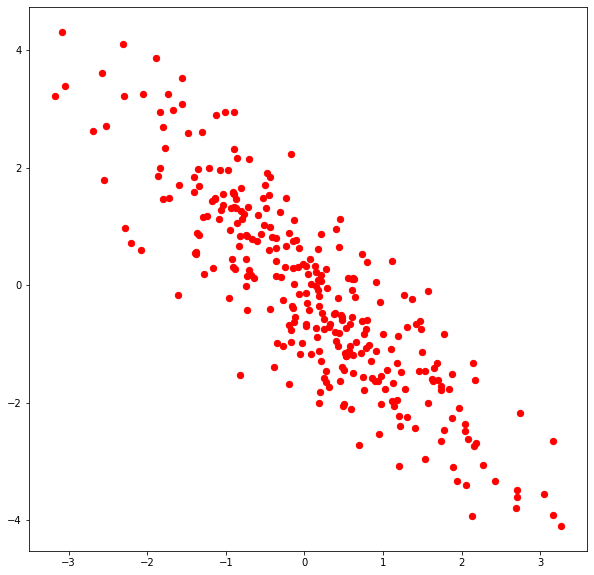

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0],
            X[:, 1],
            s=40, c = 'r')

### Applying PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [9]:
pca.components_

array([[-0.57532172,  0.81792721],
       [-0.81792721, -0.57532172]])

In [10]:
pca.explained_variance_ratio_

array([0.93905057, 0.06094943])

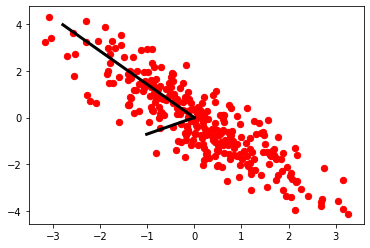

In [8]:
plt.scatter(X[:, 0],
            X[:, 1],
            s=40, c = 'r')

for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)

### Explain 90% of variance

In [11]:
pca = PCA(.90)
X_reduced = pca.fit_transform(X)

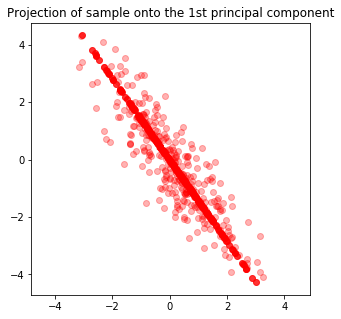

In [13]:
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(5,5))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

### Interpreting Data

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


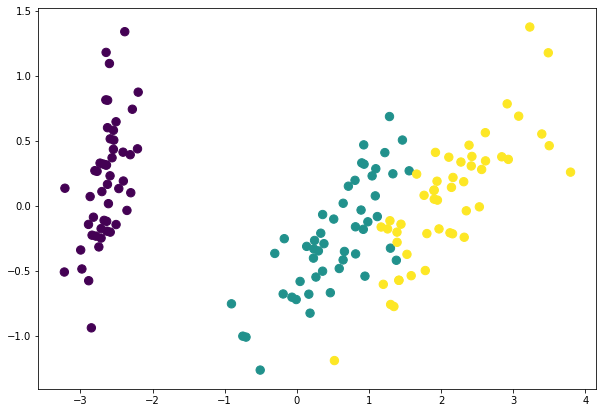

In [14]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

* PCA can be used to reduce training time, because with 

In [ ]:
PCA()